2022 spring final term

In [4]:
pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 48.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 42.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 21.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install bs4

In [5]:
pip install selenium

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   --------------- ------------------------ 3.7/9.7 MB 18.2 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.7 MB 26.3 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# 2022 spring final term exam Q1
import requests
from bs4 import BeautifulSoup

year = int(input())
nth = int(input())

url = 'https://www.waternow.go.kr/web/ssdoData/?pMENUID=8&ATTR_1={year}&ATTR_5=5'

header_info = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582'}
page = requests.get(url, headers = header_info)
page = page.text
soup = BeautifulSoup(page, 'html.parser')

table_data = soup.find_all('tr')
table_data = table_data[3:]
data = []

for i in range(len(table_data)):
    info = []
    ith_data = table_data[i].find_all('td')

    if ith_data[2].text == '전국(지자체)' or ith_data[2].text == '수자원공사':
        continue
    
    info.append(ith_data[2].text)
    info.append(float(ith_data[4].text.replace(',', '')))
    data.append(info)

data = sorted(data, key = lambda x: x[1], reverse = True)

print(int(data[nth - 1][1]))

IndexError: list index out of range

In [13]:
# 1 중요!!!!!*****
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd

year = int(input())
nth = int(input())

url = 'https://www.waternow.go.kr/web/ssdoData/?pMENUID=8&ATTR_1=2020&ATTR_5=5'

specific_options = webdriver.ChromeOptions()
specific_options.add_argument('--headless')
specific_options.add_argument('--no-sandbox')
driver = webdriver.Chrome(options = specific_options)

driver.get(url)

year_box = driver.find_element(By.ID, 'selectYear')
year_box.send_keys(year)
time.sleep(1)

search_button_xpath = '//*[@id="conts"]/div/div/p[1]/a'
search_button = driver.find_element(By.XPATH, search_button_xpath)
search_button.click()
time.sleep(1)

soup = BeautifulSoup(driver.page_source, 'html.parser')

table_data = soup.find_all('tr')

table_data = table_data[3:]

data = []

for i in range(len(table_data)):
    info = []
    ith_data = table_data[i].find_all('td')

    if ith_data[2].text == '전국(지자체)' or ith_data[2].text == '수자원공사':
        continue
    
    info.append(ith_data[2].text)
    info.append(float(ith_data[4].text.replace(',', '')))
    data.append(info)

data = sorted(data, key = lambda x: x[1], reverse = True)

driver.close()

print(int(data[nth-1][1]))

1583


In [ ]:
# 2022 spring final term exam Q1
 

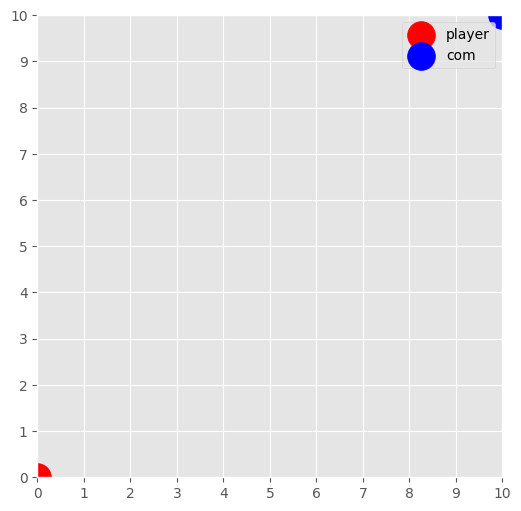

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

OUT OF AREA!
GAME OVER


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 초기 데이터
df_dict = dict()
df_dict['player'] = [0, 0]
df_dict['com'] = [10, 10]

# 0행이 x좌표, 1행이 y좌표
df = pd.DataFrame(df_dict)

# 플레이어 명령어 처리 함수
def command(cmd, df):
    if cmd == 'U':
        df.loc[1, 'player'] += 1
    elif cmd == 'D':
        df.loc[1, 'player'] -= 1
    elif cmd == 'L':
        df.loc[0, 'player'] -= 1
    elif cmd == 'R':
        df.loc[0, 'player'] += 1
    else:
        print('Invalid command')

# 컴퓨터 이동 함수
def move_com(df):
    player_x, player_y = df['player']
    com_x, com_y = df['com']

    dx, dy = player_x - com_x, player_y - com_y
    if abs(dx) >= abs(dy):
        df.loc[0, 'com'] += np.sign(dx)
    else:
        df.loc[1, 'com'] += np.sign(dy)

# 플롯 초기 설정
plt.ion()  # Interactive mode on
fig, ax = plt.subplots(figsize=(6, 6))  # Figure 크기 조정
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xticks(range(11))
ax.set_yticks(range(11))
ax.grid(True)
plt.style.use('ggplot')

# 초기 플롯 생성
scatter_player = ax.scatter(df['player'][0], df['player'][1], s=400, c='red', label='player')  # Red player
scatter_com = ax.scatter(df['com'][0], df['com'][1], s=400, c='blue', label='com')  # Blue com
ax.legend()

plt.draw()  # 초기 플롯 그리기
plt.pause(1)  # 딜레이 추가

# 게임 루프
while df['player'][0] != df['com'][0] or df['player'][1] != df['com'][1]:
    cmd = input().strip().upper()
    command(cmd, df)

    # 경기장 범위 체크
    if df['player'][0] < 0 or df['player'][0] > 10 or df['player'][1] < 0 or df['player'][1] > 10:
        print('OUT OF AREA!')
        break

    move_com(df)  # 컴퓨터 이동

    # 기존 플롯 제거 후 업데이트
    scatter_player.remove()
    scatter_com.remove()
    scatter_player = ax.scatter(df['player'][0], df['player'][1], s=400, c='red', label='player')
    scatter_com = ax.scatter(df['com'][0], df['com'][1], s=400, c='blue', label='com')

    plt.draw()  # 플롯 업데이트 반영
    plt.show()
    plt.pause(0.5)  # 딜레이

print('GAME OVER')

plt.ioff()  # Interactive mode off
plt.show()